In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
x = df[["Operating Airline", "GEO Region", "Passenger Count"]]

In [5]:
x.head()

,Operating Airline,GEO Region,Passenger Count
0,ATA Airlines,US,27271
1,ATA Airlines,US,29131
2,ATA Airlines,US,5415
3,Air Canada,Canada,35156
4,Air Canada,Canada,34090


In [6]:
x = pd.get_dummies(x, drop_first=True)

In [7]:
x.head()

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US
0,27271,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29131,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5415,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35156,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
model = KMeans(n_clusters=4)

In [9]:
model = model.fit(x)

In [14]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.8596461973029104
Number of cluster 3, silhouette 0.8285981381845348
Number of cluster 4, silhouette 0.7861526533301536
Number of cluster 5, silhouette 0.7846348186696578
Number of cluster 6, silhouette 0.6613144361536819
Number of cluster 7, silhouette 0.6600327602221503
Number of cluster 8, silhouette 0.6461260902533792
Number of cluster 9, silhouette 0.6405685338925033


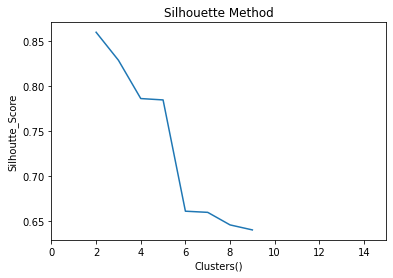

In [15]:
plt.plot(allclusters, allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15);

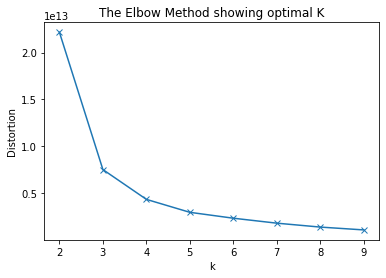

In [16]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K');